# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Gathering and Observing Data

In [2]:
main_df = pd.read_csv('/kaggle/input/aids-virus-infection-prediction/AIDS_Classification.csv')
main_df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [3]:
print(f'Shape of data: {main_df.shape}\nNumber of Columns: {len(main_df.columns)}\nSize of Dataset: {main_df.size}')

Shape of data: (2139, 23)
Number of Columns: 23
Size of Dataset: 49197


In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

# Exploratory Data Analysis

In [5]:
main_df.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,...,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,1.520804,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,0.021973,0.550257,...,0.585788,1.979897,0.172978,0.751286,0.362786,350.501169,371.307153,986.627396,935.369799,0.243572
std,292.274324,1.127890,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,0.146629,0.497584,...,0.492701,0.899053,0.378317,0.432369,0.480916,118.573863,144.634909,480.197750,444.976051,0.429338
min,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,727.000000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000
50%,997.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,353.000000,893.000000,865.000000,0.000000
75%,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,460.000000,1207.000000,1146.500000,0.000000
max,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


In [6]:
main_df.isna().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

In [7]:
for col in main_df.columns:
    print('Number of unique data in', col, ':', main_df[col].value_counts().nunique())

Number of unique data in time : 19
Number of unique data in trt : 4
Number of unique data in age : 35
Number of unique data in wtkg : 24
Number of unique data in hemo : 2
Number of unique data in homo : 2
Number of unique data in drugs : 2
Number of unique data in karnof : 4
Number of unique data in oprior : 2
Number of unique data in z30 : 2
Number of unique data in preanti : 7
Number of unique data in race : 2
Number of unique data in gender : 2
Number of unique data in str2 : 2
Number of unique data in strat : 3
Number of unique data in symptom : 2
Number of unique data in treat : 2
Number of unique data in offtrt : 2
Number of unique data in cd40 : 22
Number of unique data in cd420 : 18
Number of unique data in cd80 : 10
Number of unique data in cd820 : 11
Number of unique data in infected : 2


In [8]:
copy_df = main_df.copy()
copy_df.pop('infected')
copy_df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,0,1,0,1,0,422,477,566,324
1,1002,3,61,49.4424,0,0,0,90,0,1,...,0,1,3,0,1,0,162,218,392,564
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,1,3,0,1,1,326,274,2063,1893
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,1,3,0,1,0,287,394,1590,966
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,1,3,0,0,0,504,353,870,782


Transform values to 'category'

In [9]:
def to_categorical(df):
    cat_columns = [
        'trt',
        'hemo',
        'homo',
        'drugs',
        'oprior',
        'z30',
        'race',
        'gender',
        'str2',
        'strat',
        'symptom',
        'treat',
        'offtrt'
    ]
    for i in cat_columns:
        df[i] = pd.Categorical(df[i])
    return df

In [10]:
to_categorical(copy_df).dtypes

time          int64
trt        category
age           int64
wtkg        float64
hemo       category
homo       category
drugs      category
karnof        int64
oprior     category
z30        category
preanti       int64
race       category
gender     category
str2       category
strat      category
symptom    category
treat      category
offtrt     category
cd40          int64
cd420         int64
cd80          int64
cd820         int64
dtype: object

Clear data from outlier with z-score

In [11]:
def clear_outlier(df):
    for column in df.select_dtypes(exclude='category').columns:
        upper_limit = df[column].mean() + 3*df[column].std()
        lower_limit = df[column].mean() - 3*df[column].std()

        df[column] = np.where(
            df[column]>upper_limit,
            upper_limit,
            np.where(
                df[column]<lower_limit,
                lower_limit,
                df[column]
            )
        )
    return df

In [12]:
clear_outlier(copy_df)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,948.0,2,48.0,89.8128,0,0,0,100.0,0,0,...,0,0,1,0,1,0,422.000000,477.00000,566.0,324.0
1,1002.0,3,61.0,49.4424,0,0,0,90.0,0,1,...,0,1,3,0,1,0,162.000000,218.00000,392.0,564.0
2,961.0,3,45.0,88.4520,0,1,1,90.0,0,1,...,1,1,3,0,1,1,326.000000,274.00000,2063.0,1893.0
3,1166.0,3,47.0,85.2768,0,1,0,100.0,0,1,...,1,1,3,0,1,0,287.000000,394.00000,1590.0,966.0
4,1090.0,0,43.0,66.6792,0,1,0,100.0,0,1,...,1,1,3,0,0,0,504.000000,353.00000,870.0,782.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,1091.0,3,21.0,53.2980,1,0,0,100.0,0,1,...,1,1,3,0,1,1,152.000000,109.00000,561.0,720.0
2135,395.0,0,17.0,102.9672,1,0,0,100.0,0,1,...,1,1,3,0,0,1,373.000000,218.00000,1759.0,1030.0
2136,1104.0,2,53.0,69.8544,1,1,0,90.0,0,1,...,1,1,3,0,1,0,419.000000,364.00000,1391.0,1041.0
2137,465.0,0,14.0,60.0000,1,0,0,100.0,0,0,...,1,0,1,0,0,0,166.000000,169.00000,999.0,1838.0


# Data Visualization

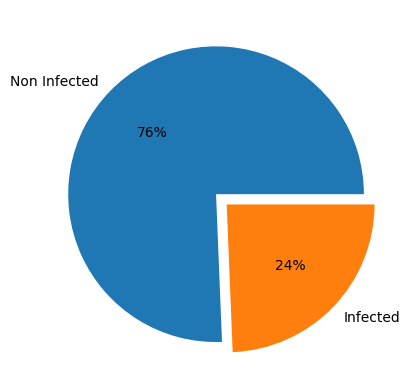

In [13]:
plt.pie(
    main_df['infected'].value_counts(),
    labels=['Non Infected', 'Infected'],
    explode=[0, 0.1],
    autopct='%.0f%%'
);

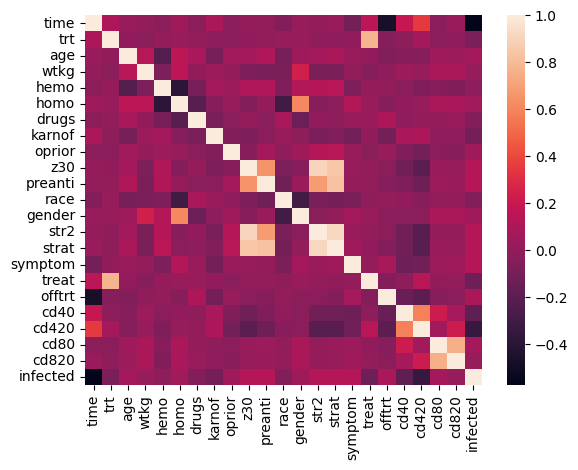

In [14]:
sns.heatmap(main_df.corr());

# Pipeline

In [15]:
cat_cs = make_column_selector(dtype_include='category')

cat_ohe = OneHotEncoder(sparse_output=False, drop='if_binary').set_output(transform='pandas')
cat_pipeline = make_pipeline(cat_ohe)


num_cs = make_column_selector(dtype_exclude='category')

num_scl = StandardScaler().set_output(transform='pandas')
num_pipeline = make_pipeline(num_scl)

col_t = make_column_transformer(
    (num_pipeline, num_cs),
    (cat_pipeline, cat_cs)
)

In [16]:
preprocess = make_pipeline(
    FunctionTransformer(to_categorical),
    FunctionTransformer(clear_outlier),
    col_t
)

preprocess.set_output(transform='pandas')

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_function_transformer.py:343: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function to_categorical at 0x7c9d4bec2c20>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function clear_outlier at 0x7c9cd4211f30>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c9cd205fbb0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c9cd205c250>)]))])

# Model Selection

In [17]:
X = main_df.copy()
y = X.pop("infected")

In [18]:
models = {
    "Nearest Neighbors": {
        'model': KNeighborsClassifier()
    },
    "Linear SVM": {
        'model': SVC(kernel="linear", verbose=False)
    },
    "RBF SVM": {
        'model': SVC(verbose=False)
    },
    "Gaussian Process": {
        'model': GaussianProcessClassifier()
    },
    "Decision Tree": {
        'model': DecisionTreeClassifier()
    },
    "Random Forest": {
        'model': RandomForestClassifier(verbose=False)
    },
    "Neural Net": {
        'model': MLPClassifier(verbose=False)
    },
    "AdaBoost": {
        'model': AdaBoostClassifier()
    },
    "Naive Bayes": {
        'model': GaussianNB()
    },
    "QDA": {
        'model': QuadraticDiscriminantAnalysis()
    },
    'LGBM': {
        'model': LGBMClassifier(verbose=0)
    },
    'CatBoost': {
        'model': CatBoostClassifier(verbose=False)
    },
    'XGB': {
        'model': XGBClassifier()
    }
}

In [19]:
for model in models:
    print('#######################')
    print(f'{model} is training...')

    model_pipeline = make_pipeline(preprocess, models[model]['model'])
    scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='accuracy')
    
    models[model]['ACC'] = scores

#######################
Nearest Neighbors is training...
#######################
Linear SVM is training...
#######################
RBF SVM is training...
#######################
Gaussian Process is training...
#######################
Decision Tree is training...
#######################
Random Forest is training...
#######################
Neural Net is training...


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

#######################
AdaBoost is training...
#######################
Naive Bayes is training...
#######################
QDA is training...


/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


#######################
LGBM is training...
#######################
CatBoost is training...
#######################
XGB is training...


In [20]:
for model in models:
    print('#######################')
    print(f"{model}\nAccuracy CV 5: {models[model]['ACC']}\nAccuarcy Mean: {models[model]['ACC'].mean()}")

#######################
Nearest Neighbors
Accuracy CV 5: [0.85747664 0.82476636 0.86448598 0.85981308 0.79625293]
Accuarcy Mean: 0.8405589966950469
#######################
Linear SVM
Accuracy CV 5: [0.87850467 0.84345794 0.89252336 0.87616822 0.82903981]
Accuarcy Mean: 0.8639388036507694
#######################
RBF SVM
Accuracy CV 5: [0.89485981 0.85280374 0.89719626 0.91121495 0.85245902]
Accuarcy Mean: 0.8817067565497165
#######################
Gaussian Process
Accuracy CV 5: [0.86214953 0.82242991 0.86214953 0.85981308 0.79625293]
Accuarcy Mean: 0.8405589966950469
#######################
Decision Tree
Accuracy CV 5: [0.85280374 0.8317757  0.86448598 0.83411215 0.84074941]
Accuarcy Mean: 0.844785396922673
#######################
Random Forest
Accuracy CV 5: [0.90186916 0.86448598 0.90654206 0.90420561 0.85948478]
Accuarcy Mean: 0.8873175162511764
#######################
Neural Net
Accuracy CV 5: [0.89018692 0.86214953 0.88551402 0.9135514  0.86651054]
Accuarcy Mean: 0.883582481560112

In [21]:
plot_df = pd.DataFrame({'Model': [], 'ACC': []})
for model in models:
    plot_df.loc[len(plot_df.index)] = [model, models[model]['ACC'].mean()]

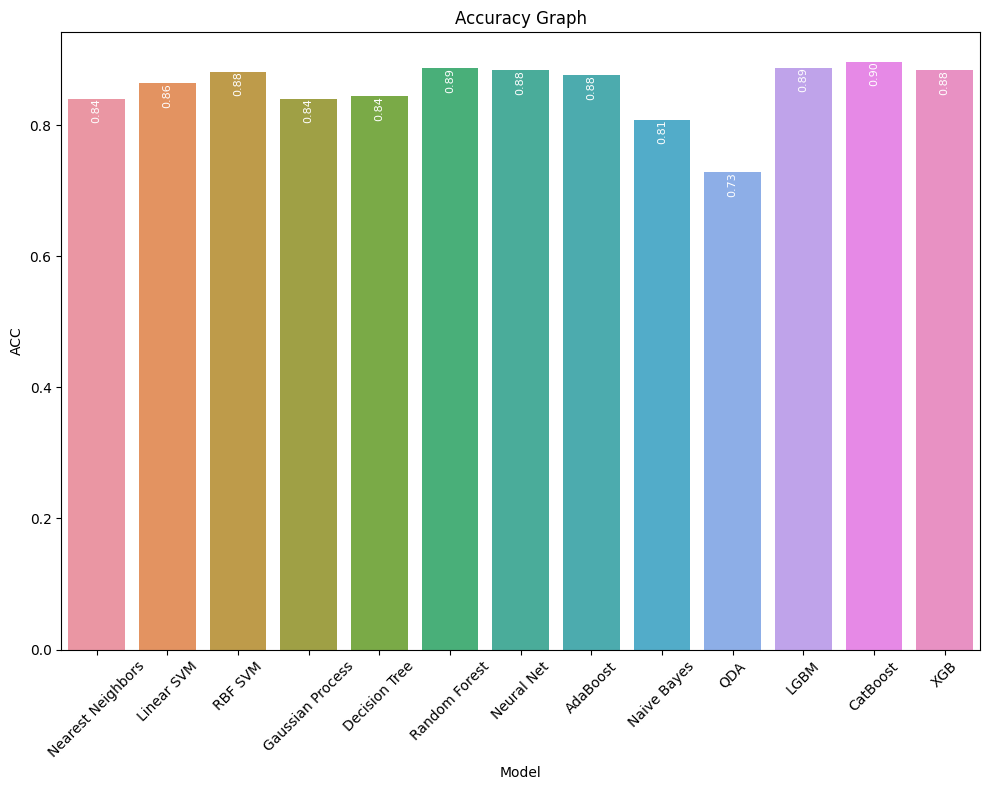

In [22]:
fig, axs = plt.subplots(1, 1, figsize=(10, 8))

sns.barplot(x='Model', y='ACC', data=plot_df, ax=axs)
axs.set_title(f'Accuracy Graph')
axs.set_xticklabels(axs.get_xticklabels(), rotation=45)
for p in axs.patches:
    height = p.get_height()
    width = p.get_x() + p.get_width() / 2.
    axs.text(width, height, f'{height:.2f}', ha='center', va='top', rotation=90, fontsize=8, color='white')


plt.tight_layout()
plt.show()